# Desafio 7

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna `NU_NOTA_MT`) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT`.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
#Carregando dados de treino e teste

df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

In [3]:
df_treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
#Selecionando váriaveis com notas para verificar correlações e treinar o modelo
#Selecionamos apenas as notas que serão utilizadas

notas = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

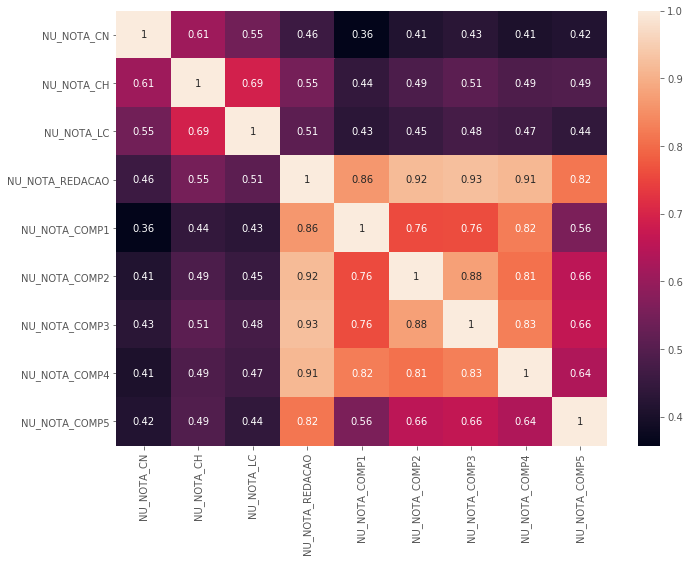

In [5]:
#Verificando correlações com HeatMap

corr = df_treino[notas].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [6]:
# Verificando valores nulos nos dados de teste e treino

print(df_treino[notas].isnull().sum())
print(" ")
print(df_teste[notas].isnull().sum())

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64
 
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64


In [7]:
#Selecionando apenas valores não-nulos nos dados de teste e treino

df_treino = df_treino.loc[
      (df_treino['NU_NOTA_CN'].notnull())  & (df_treino['NU_NOTA_CN'] != 0) & (df_treino['NU_NOTA_CH'].notnull())      & (df_treino['NU_NOTA_CH'] != 0) 
    & (df_treino['NU_NOTA_LC'].notnull())  & (df_treino['NU_NOTA_LC'] != 0) & (df_treino['NU_NOTA_REDACAO'].notnull()) & (df_treino['NU_NOTA_REDACAO'] != 0)    
]

df_teste = df_teste.loc[
      (df_teste['NU_NOTA_CN'].notnull())  & (df_teste['NU_NOTA_CN'] != 0) & (df_teste['NU_NOTA_CH'].notnull())      & (df_teste['NU_NOTA_CH'] != 0) 
    & (df_teste['NU_NOTA_LC'].notnull())  & (df_teste['NU_NOTA_LC'] != 0) & (df_teste['NU_NOTA_REDACAO'].notnull()) & (df_teste['NU_NOTA_REDACAO'] != 0)    
]


print(df_treino[notas].isnull().sum())
print(" ")
print(df_teste[notas].isnull().sum())

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64
 
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64


In [8]:
#Definindo treino e teste

X_treino = df_treino[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_REDACAO']]
Y_treino = df_treino['NU_NOTA_MT']

X_teste = df_teste[['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_REDACAO']]

In [9]:
#Treinando modelo de Regressão Linear Simples

lreg = LinearRegression()

lreg.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#Prevendo .predcit e printando as previsões

Y_previsao = lreg.predict(X_teste)
Y_previsao = [int(nota) for nota in Y_previsao]
print(Y_previsao)

[436, 433, 580, 539, 464, 538, 436, 474, 467, 452, 570, 530, 467, 387, 433, 496, 636, 429, 587, 392, 453, 405, 564, 507, 547, 489, 462, 433, 454, 608, 491, 429, 514, 458, 439, 513, 492, 485, 456, 443, 575, 494, 496, 486, 410, 443, 419, 448, 477, 548, 579, 426, 472, 604, 489, 559, 480, 402, 509, 477, 439, 474, 387, 420, 540, 438, 419, 485, 504, 411, 511, 423, 413, 447, 541, 438, 473, 485, 475, 417, 405, 697, 394, 503, 549, 517, 468, 397, 577, 418, 485, 430, 448, 529, 416, 435, 394, 589, 545, 410, 517, 473, 465, 463, 480, 485, 474, 445, 424, 514, 508, 440, 398, 489, 573, 448, 489, 428, 481, 520, 388, 462, 388, 434, 423, 500, 425, 442, 498, 515, 441, 453, 480, 535, 442, 491, 592, 435, 479, 483, 463, 416, 538, 467, 513, 434, 585, 438, 558, 460, 433, 512, 465, 382, 517, 504, 432, 539, 476, 466, 542, 434, 459, 545, 456, 490, 470, 442, 417, 485, 497, 430, 431, 416, 440, 654, 436, 500, 491, 435, 501, 426, 385, 445, 404, 448, 435, 390, 573, 418, 559, 550, 439, 460, 403, 438, 438, 446, 447, 399,

In [11]:
#Formatando resultado

resultado = pd.DataFrame({"NU_INSCRICAO": df_teste["NU_INSCRICAO"],"NU_NOTA_MT" : Y_previsao})

resultado

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433
2,b38a03232f43b11c9d0788abaf060f7366053b6d,580
4,715494628a50142ce8cb17191cfe6d0f3cae0934,539
5,e656d6bad65c93fb2880f1eba5037008c8e75774,464
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,510
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,445
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,461
4573,655fa6306720ff16e825903b5422a46608a77545,620


In [12]:
#Salvando em .csv

resultado.to_csv("answer.csv",index=False) 